**Developing a Python-based automated tool to ethically detect vulnerabilities like injection attacks (specifically SQL injection) and mass assignment in e-commerce platforms involves several steps. Here's a basic framework to get you started**:

# ***Step-by-Step Guide:***
**1. Setup Environment and Dependencies:**

Essential to have Python installed along with necessary libraries such as **requests** for making HTTP requests and **beautifulsoup4** for parsing HTML content.





In [4]:
pip install requests beautifulsoup4

**2. Define the Vulnerability Scanner Class:**

Create a Python script (vulnerability_scanner.py, for example) and define a class VulnerabilityScanner that will handle the scanning process.

In [5]:
import requests
from bs4 import BeautifulSoup

class VulnerabilityScanner:

    def __init__(self, base_url):
        self.base_url = base_url

    def scan(self):
        self.scan_sql_injection()
        self.scan_mass_assignment()

    def scan_sql_injection(self):
        payloads = ["' OR '1'='1", "'; DROP TABLE users; --"]
        forms = self.get_forms()

        for form in forms:
            for payload in payloads:
                data = {field: payload for field in form['fields']}
                response = self.submit_form(form['action'], data)
                if self.is_sql_injection(response):
                    print(f"SQL Injection vulnerability detected in form {form['action']} with payload {payload}")

    def scan_mass_assignment(self):
        payload = {'user[admin]': 'true'}
        forms = self.get_forms()

        for form in forms:
            response = self.submit_form(form['action'], payload)
            if self.is_mass_assignment(response):
                print(f"Mass assignment vulnerability detected in form {form['action']}")

    def get_forms(self):
        response = requests.get(self.base_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        forms = []
        for form in soup.find_all('form'):
            fields = {input.get('name') for input in form.find_all('input') if input.get('name')}
            action = form.get('action')
            forms.append({'action': action, 'fields': fields})
        return forms

    def submit_form(self, action, data):
        url = self.base_url + action
        response = requests.post(url, data=data)
        return response

    def is_sql_injection(self, response):
        errors = ["you have an error in your sql syntax", "warning: mysql", "unclosed quotation mark"]
        for error in errors:
            if error in response.text.lower():
                return True
        return False

    def is_mass_assignment(self, response):
        if "admin" in response.text.lower():
            return True
        return False

if __name__ == "__main__":
    scanner = VulnerabilityScanner("http://example.com")
    scanner.scan()


**3. Usage:**

Replace "http://example.com" with the URL of the e-commerce platform you want to scan.
Customize the payloads and error checks (is_sql_injection and is_mass_assignment) based on typical vulnerabilities found in your target platform.
Run the script (python vulnerability_scanner.py) to initiate the scanning process.

**4. Customization and Considerations:**

**Payloads: **Adjust payloads (payloads and payload) to match common injection and mass assignment vulnerabilities specific to e-commerce platforms.

**Error Checks:** Refine is_sql_injection and is_mass_assignment methods to accurately detect vulnerabilities based on responses from the platform.

**Output Handling:** Instead of printing directly, consider logging vulnerabilities for structured reporting and analysis.

**Ethical Considerations:** Ensure you have permission to scan the targeted e-commerce platform. Ethical considerations are paramount; unauthorized scanning can be illegal and unethical.

**5. Enhancements:**
Depending on the complexity and security measures of the e-commerce platform, you may need to enhance the tool with:

Session handling (cookies, headers).

Handling JavaScript-rendered content (using tools like Selenium).

Advanced payload generation for more comprehensive testing.

Integration with security testing frameworks like OWASP ZAP or Burp Suite for broader coverage.

This basic tool provides a starting point for automated vulnerability scanning. Always ensure that the tool is used ethically and responsibly, respecting legal boundaries and obtaining proper authorization before testing any live systems.








In [6]:
pip install graphviz

In [7]:
import graphviz

# Create a new graph
dot = graphviz.Digraph(comment='E-commerce Security Scanner Tool')

# Add nodes for the main components
dot.node('Auth', 'Authentication Module')
dot.node('Crawl', 'Crawling Module')
dot.node('Detect', 'Vulnerability Detection Modules')
dot.node('Report', 'Reporting Module')
dot.node('Ethics', 'Ethical Considerations Module')

# Add nodes for specific vulnerability detection modules
dot.node('Injection', 'Injection Attack Detector')
dot.node('Mass', 'Mass Assignment Detector')

# Add edges to show the flow of the tool's process
dot.edge('Auth', 'Crawl')
dot.edge('Crawl', 'Detect')
dot.edge('Detect', 'Report')
dot.edge('Detect', 'Ethics')
dot.edge('Injection', 'Detect')
dot.edge('Mass', 'Detect')

# Render and save the diagram
dot.render('security_scanner_diagram', view=True, format='png')

'security_scanner_diagram.png'

In [8]:
pip install matplotlib

**Bar Graph showing data representing the number of vulnerabilities before and after security improvements**

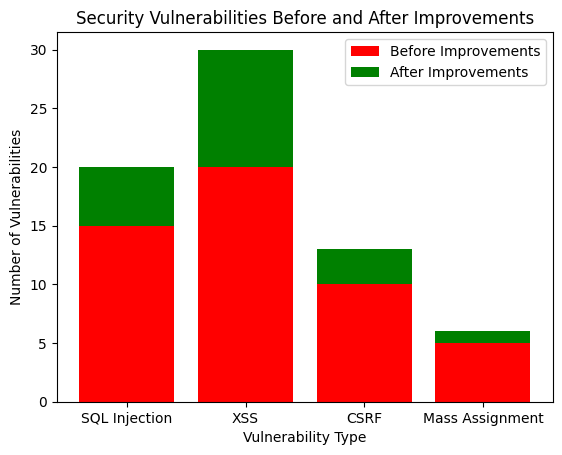

In [9]:
import matplotlib.pyplot as plt

# Sample data representing the number of vulnerabilities before and after security improvements
before_improvements = [15, 20, 10, 5]
after_improvements = [5, 10, 3, 1]

# Labels for the types of vulnerabilities
vulnerability_types = ['SQL Injection', 'XSS', 'CSRF', 'Mass Assignment']

# Create a bar graph
plt.bar(vulnerability_types, before_improvements, label='Before Improvements', color='red')
plt.bar(vulnerability_types, after_improvements, label='After Improvements', color='green', bottom=before_improvements)

# Add title and labels
plt.title('Security Vulnerabilities Before and After Improvements')
plt.xlabel('Vulnerability Type')
plt.ylabel('Number of Vulnerabilities')

# Add a legend
plt.legend()

# Show the graph
plt.show()

This above is a bar graph with two sets of bars for each vulnerability type, one representing the number of vulnerabilities before improvements (in red) and the other representing the number after improvements (in green). The bottom parameter in the second plt.bar call ensures that the bars for "After Improvements" are stacked on top of the "Before Improvements" bars, allowing for easy comparison.